#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

#### 2. Reading the Data

In [2]:
Churn_Train = pd.read_excel("D:\PRAXIS\Datasets\Churn.xlsx", sheet_name = "Train")
Churn_Test = pd.read_excel("D:\PRAXIS\Datasets\Churn.xlsx", sheet_name = "Test")

In [3]:
# combine test and train into one dataset

nw = pd.concat([Churn_Train, Churn_Test])

In [4]:
nw.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,random
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,SD,415,370-2957,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,WV,510,329-7102,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,DE,415,346-5053,3
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,UT,415,387-2014,3
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,WA,408,354-9492,4


#### 3. Scaling the Data

In [5]:
# drop the categorical variables, since these do not add any information here

nw = nw.drop(["State", "Area_Code", "Phone"], axis = 1)

In [6]:
nw_scaled = nw.apply(lambda x: (x - np.mean(x)) / np.std(x))
nw_scaled.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,random
0,-0.353244,0.942620,0.628450,-0.413763,-1.312576,0.129936,-1.188218,-0.411672,-0.32758,1.617086,0.626149,0.628393,0.697085,-0.413812,-0.925484,-1.313682,0.211534,0.126607,-1.729831
1,-0.956015,-0.591760,-0.860738,-2.642285,-0.800376,-0.120832,1.092641,-0.411672,-0.32758,-0.618396,1.074667,-0.861122,-1.913404,-2.641180,1.067803,-0.799517,-1.007560,-0.125496,-1.728787
2,0.048603,1.892474,-0.752400,-1.163177,-0.337617,0.559825,-0.427932,-0.411672,-0.32758,1.617086,-1.018418,-0.752028,0.395875,-1.163229,-1.181033,-0.338086,1.024263,0.564470,-1.727743
3,-1.433208,-0.591760,0.419119,-0.749027,1.329502,-0.694017,-1.188218,-0.411672,-0.32758,-0.618396,-0.569899,0.418846,-0.206546,-0.747918,2.601101,1.327459,-0.601195,-0.696046,-1.727743
4,1.630877,-0.591760,1.735701,-2.920358,0.894430,0.237408,-1.188218,-0.411672,-0.32758,-0.618396,0.476643,1.735538,0.446077,-2.919601,0.965583,0.892396,0.211534,0.232756,-1.726698


#### 4. Plotting a Dendrogram

In [7]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
Z = linkage(nw_scaled, 'complete')

In [9]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
       

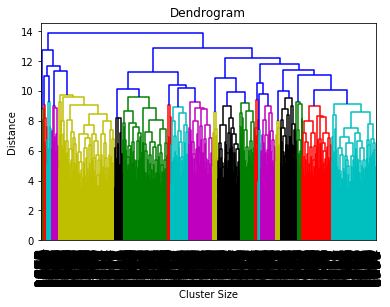

In [10]:
dendrogram(Z, leaf_rotation = 90, leaf_font_size = 15.)

plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

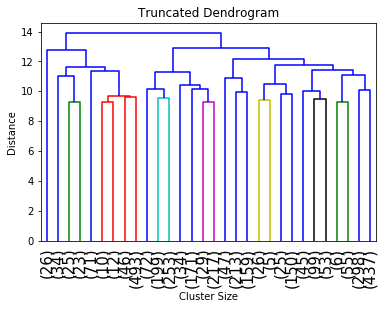

In [11]:
dendrogram(Z, truncate_mode = 'lastp', p = 30, leaf_rotation = 90, leaf_font_size = 15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### 5. Agglomerative Hierarchical Clustering

In [12]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [25]:
hclust = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [26]:
hclust.fit(nw_scaled)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

#### 6. Grouping the Data

In [27]:
nw['Groups'] = hclust.labels_

In [17]:
nw.head(10)

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,random,Groups
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,113,36.38,114,15.30,82,6.05,5,2.86,1,0
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,122,22.59,62,5.70,121,7.22,2,2.67,2,3
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,80,23.60,108,12.07,77,8.27,7,3.19,3,0
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,89,34.44,96,13.86,151,12.06,3,2.24,3,2
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,110,46.63,109,4.50,119,11.07,5,2.94,4,3
5,88,0,189.8,197.3,234.5,14.9,2,0,0,0,111,32.27,101,16.77,111,10.55,3,4.02,5,0
6,160,0,174.3,171.3,220.8,8.3,0,0,0,0,105,29.63,107,14.56,131,9.94,2,2.24,6,1
7,120,0,137.3,212.2,152.7,10.5,1,0,0,0,100,23.34,129,18.04,92,6.87,2,2.84,6,4
8,92,0,181.4,164.5,171.0,10.9,2,0,0,0,98,30.84,98,13.98,110,7.69,4,2.94,6,1
9,95,20,165.7,215.6,243.3,9.8,0,0,0,1,78,28.17,94,18.33,91,10.95,6,2.65,8,2


#### 7. Checking the Aggregate of the groups


In [18]:
nw.groupby(['Groups']).mean()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Int'l_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,random
Groups,,,,,,,,,,,,,,,,,,,
0,99.731443,7.521268,205.428274,194.771309,190.514262,11.184404,1.502085,0.262719,0.208507,0.254379,99.592994,34.923319,100.906589,16.555705,97.847373,8.573186,4.388657,3.020259,1749.648040
1,106.820728,4.740896,172.096639,184.359384,194.399860,8.221989,1.994398,0.149860,0.029412,0.166667,101.942577,29.256933,98.193277,15.670770,99.184874,8.748109,3.903361,2.220448,1654.852941
2,98.156923,9.793846,153.147795,205.328615,230.699795,10.646564,1.302564,0.055385,0.049231,0.332308,102.168205,26.035733,101.771282,17.453200,103.089231,10.381651,4.482051,2.875210,1541.646154
3,108.615385,0.000000,192.565385,72.926923,189.730769,10.446154,1.115385,0.000000,0.153846,0.000000,102.076923,32.736538,93.846154,6.199231,102.346154,8.537308,6.307692,2.820385,1412.615385
4,101.369928,12.033413,180.618377,244.898807,172.823628,9.995943,1.634845,0.016706,0.000000,0.415274,96.145585,30.705656,97.653938,20.816635,101.071599,7.777064,5.601432,2.699284,1682.472554


#### 8. K-Means Clustering


In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters = 5, n_init = 40)

#Fit the kmeans model
km.fit(nw_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
#Cluster labels
km.labels_

array([2, 1, 2, ..., 0, 4, 3])

In [22]:
#Within Group SSE
km.inertia_

48634.171841224816

In [23]:
inertias = []
for k in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters = k, n_init = 40)
    inertia = km.fit(nw_scaled).inertia_
    inertias.append(inertia)

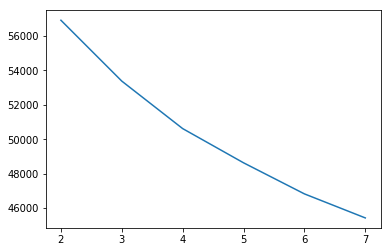

In [24]:
#Plotting the scree plot
plt.plot([2, 3, 4, 5, 6, 7], inertias)
plt.show()